In [37]:
import numpy as np
import pandas as pd
import pandas as pd
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics    
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [2]:
data = pd.read_csv('/Users/charleshajjar/OneDrive/indeed-master/csv/jobs_it_ml.csv')

In [3]:
data = data[data.salary_mean.notnull()]


In [4]:
data = data[data.dep.notnull()]

In [5]:
data.head(10)

,salary_mean,salary_band,dep,query_developpeur,query_data+scientist,query_business+intelligence,query_data+analyst,contract_commission,contract_cdi,contract_intérim,...,éol,éolien,éolienne,épargne,équipe,étud,étude,études,évaluation,être
5,40458.0,1.0,75.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,48000.0,1.0,67.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16,60000.0,1.0,33.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,60000.0,1.0,94.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,60000.0,1.0,33.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
39,55000.0,1.0,92.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
45,10800.0,0.0,31.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49,41391.5,1.0,33.0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
54,42000.0,1.0,75.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,50000.0,1.0,75.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.shape

(447, 1913)

In [7]:
y=data['salary_mean']
X=data.drop(['salary_mean'], axis=1)

In [8]:
train_data, test_data, train_label, test_label = train_test_split(X, y, test_size  = 0.25)

In [9]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [10]:
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=100
)

In [11]:
regressor.fit(train_data, train_label)

[16:58:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=100, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [12]:
y_pred = regressor.predict(test_data)

In [13]:
mean_squared_error(test_label, y_pred)

86393772.12654509

In [46]:
r2_score(test_label,y_pred)

0.8159805308863742

In [15]:
data.isna().sum()

salary_mean             0
salary_band             0
dep                     0
query_developpeur       0
query_data+scientist    0
                       ..
étud                    0
étude                   0
études                  0
évaluation              0
être                    0
Length: 1913, dtype: int64

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [18]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [20]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_data, train_label)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [21]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': True}

In [38]:
def evaluate(model, test_data, test_label):
    predictions = model.predict(test_data)
    errors = abs(predictions - test_label)
    mape = 100 * np.mean(errors / test_label)
    r2 = r2_score(predictions,test_label)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))

    
    return r2

In [42]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_data, train_label)
evaluate(base_model, test_data, test_label)

Model Performance
Average Error: 7032.3272 degrees.


0.7318879983141704

In [40]:
base_model.predict(test_data)

array([107280.        ,  32111.        ,  36052.        ,  49550.        ,
        36990.        ,  46880.        ,  36098.        ,  42871.6       ,
        68750.        ,  38904.2       ,  40250.        ,  39109.55      ,
        39709.6       ,  39623.2       ,  34950.        ,  17845.7       ,
        54450.        ,  49233.33333333,  47209.6       ,  50875.        ,
        43012.55      ,  13980.        ,  51000.        ,  10950.        ,
        35428.        ,  72400.        ,  68900.        ,  19801.3       ,
        51141.6       ,  31100.        , 107280.        ,  72072.        ,
        41665.3       , 101760.        ,  36228.        ,  45635.75      ,
       108000.        ,  42835.75      ,  48706.5       ,  52000.        ,
        43183.33333333,  49550.        ,  49091.6       ,   9919.2       ,
        37426.        ,  49780.        ,  68850.        ,  70380.71666667,
        40999.2       ,  50845.8       ,  34030.        ,  51950.        ,
        37236.95      ,  

In [44]:
best_random = rf_random.best_estimator_
random_r2 = evaluate(best_random, test_data, test_label)
print(random_r2)

Model Performance
Average Error: 6463.4331 degrees.
0.7748832118880755


In [32]:
y_pred1=base_model.predict(test_data)

In [34]:
y_pred1,test_label

(array([107280.        ,  32111.        ,  36052.        ,  49550.        ,
         36990.        ,  46880.        ,  36098.        ,  42871.6       ,
         68750.        ,  38904.2       ,  40250.        ,  39109.55      ,
         39709.6       ,  39623.2       ,  34950.        ,  17845.7       ,
         54450.        ,  49233.33333333,  47209.6       ,  50875.        ,
         43012.55      ,  13980.        ,  51000.        ,  10950.        ,
         35428.        ,  72400.        ,  68900.        ,  19801.3       ,
         51141.6       ,  31100.        , 107280.        ,  72072.        ,
         41665.3       , 101760.        ,  36228.        ,  45635.75      ,
        108000.        ,  42835.75      ,  48706.5       ,  52000.        ,
         43183.33333333,  49550.        ,  49091.6       ,   9919.2       ,
         37426.        ,  49780.        ,  68850.        ,  70380.71666667,
         40999.2       ,  50845.8       ,  34030.        ,  51950.        ,
         372

In [49]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [50]:
# Fit the grid search to the data
grid_search.fit(train_data, train_label)
grid_search.best_params_


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  1.8min finished


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [60]:
best_grid = grid_search.best_estimator_
grid_r2 = evaluate(best_grid, test_data, test_label)
print(grid_r2)

Model Performance
Average Error: 16488.5809 degrees.
-13994.825934572797


In [65]:
grid_search.predict(test_data)

array([46656.27008212, 46008.48352689, 46136.71587512, 46412.29322422,
       46008.48352689, 46061.52034097, 45936.84086282, 46008.48352689,
       46082.65649955, 46046.87195882, 45813.5136403 , 46008.48352689,
       45971.71289514, 46008.48352689, 46008.48352689, 46082.65649955,
       46200.60717522, 46200.60717522, 45979.46425911, 46320.86797821,
       46042.23212863, 45651.37862229, 46042.23212863, 45651.37862229,
       46008.48352689, 45995.97980265, 46181.78114396, 46008.48352689,
       46200.60717522, 46087.31935262, 46656.27008212, 46320.86797821,
       45944.59222679, 46664.02144609, 46008.48352689, 46008.48352689,
       46664.02144609, 46012.88950764, 46000.73216292, 46076.52013558,
       46128.74432988, 46192.85581125, 46192.85581125, 45643.62725832,
       46200.60717522, 46121.04493148, 46082.65649955, 46200.60717522,
       46000.73216292, 46238.99560715, 46008.48352689, 46200.60717522,
       46008.48352689, 46008.48352689, 46008.48352689, 45944.59222679,
      

In [64]:
# REMARQUE/ GRID_SEARCH N4EST PAS DU TOUT ADAPTER AU MODEL DE ¨REDICTION DE VARIABLE CONTINUE CAR LA MOYENNE D4ERREUR RESTE
#RESTE CORRECTE MAIS IL SETABILISE TROP LES DONN2 EN LES RENDANT UNIFORME 

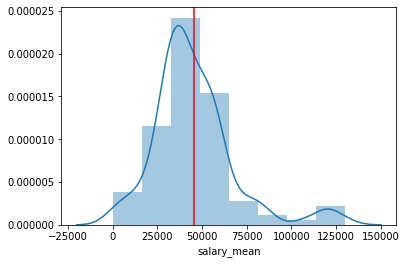

In [62]:
#resultat d'origine DES DONNé 
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.distplot(test_label, bins=8)
ax.axvline(test_label.mean(), c='r')


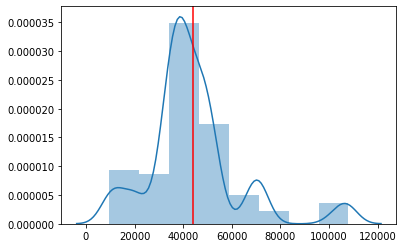

In [63]:
#resultat de fin avec RANDOMFOREST
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.distplot(y_pred, bins=8)
ax.axvline(y_pred1.mean(), c='r')

In [ ]:
#REMARQUE: RANDOME FORESTE REGRESSION EST TRES ADAPTER A NOTRE MODEL ET CELLE_REDIT AVEC UNE PETITE DIFFERENCE
#LES MOYENNE DES SALAIRE QUI SONT TRES FAVORABLE A MODEL ET AU CONTEXTE 